In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import KFold

In [ ]:
train = pd.read_csv("./data/kddcup.data_10_percent.txt", low_memory=False)
# train = pd.read_csv("./data/kddcup.data.txt", low_memory=False)
test = pd.read_csv("./data/corrected", low_memory=False)

In [ ]:
train.head(10)

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
print(train.shape)
print(test.shape)
train = train.drop_duplicates()
print(train.shape)
# Both two sets contain result feild

In [ ]:
# for i in range(train.shape[0]):
#     if train.loc[i].shape[0] != 42:
#         print (i)

# Map attack type into five classes

In [ ]:
train.loc[(train.result == 'back.'), 'result'] = 'dos'
train.loc[(train.result == 'buffer_overflow.'), 'result'] = 'u2r'
train.loc[(train.result == 'ftp_write.'), 'result'] = 'r2l'
train.loc[(train.result == 'guess_passwd.'), 'result'] = 'r2l'
train.loc[(train.result == 'imap.'), 'result'] = 'r2l'
train.loc[(train.result == 'ipsweep.'), 'result'] = 'probe'
train.loc[(train.result == 'land.'), 'result'] = 'dos'
train.loc[(train.result == 'loadmodule.'), 'result'] = 'u2r'
train.loc[(train.result == 'multihop.'), 'result'] = 'r2l'
train.loc[(train.result == 'neptune.'), 'result'] = 'dos'
train.loc[(train.result == 'nmap.'), 'result'] = 'probe'
train.loc[(train.result == 'perl.'), 'result'] = 'u2r'
train.loc[(train.result == 'phf.'), 'result'] = 'r2l'
train.loc[(train.result == 'pod.'), 'result'] = 'dos'
train.loc[(train.result == 'portsweep.'), 'result'] = 'probe'
train.loc[(train.result == 'rootkit.'), 'result'] = 'u2r'
train.loc[(train.result == 'satan.'), 'result'] = 'probe'
train.loc[(train.result == 'smurf.'), 'result'] = 'dos'
train.loc[(train.result == 'spy.'), 'result'] = 'r2l'
train.loc[(train.result == 'teardrop.'), 'result'] = 'dos'
train.loc[(train.result == 'warezclient.'), 'result'] = 'r2l'
train.loc[(train.result == 'warezmaster.'), 'result'] = 'r2l'

In [ ]:
test.loc[(test.result == 'apache2.'), 'result'] = 'dos'
test.loc[(test.result == 'back.'), 'result'] = 'dos'
test.loc[(test.result == 'buffer_overflow.'), 'result'] = 'u2r'
test.loc[(test.result == 'ftp_write.'), 'result'] = 'r2l'
test.loc[(test.result == 'guess_passwd.'), 'result'] = 'r2l'
# duplicate
test.loc[(test.result == 'httptunnel.'), 'result'] = 'r2l'
test.loc[(test.result == 'httptunnel.'), 'result'] = 'u2r'

test.loc[(test.result == 'imap.'), 'result'] = 'r2l'
test.loc[(test.result == 'ipsweep.'), 'result'] = 'probe'
test.loc[(test.result == 'land.'), 'result'] = 'dos'
test.loc[(test.result == 'loadmodule.'), 'result'] = 'u2r'
test.loc[(test.result == 'mailbomb.'), 'result'] = 'dos'
test.loc[(test.result == 'mscan.'), 'result'] = 'probe'
# duplicate
test.loc[(test.result == 'multihop.'), 'result'] = 'r2l'
test.loc[(test.result == 'multihop.'), 'result'] = 'u2r'

test.loc[(test.result == 'named.'), 'result'] = 'r2l'
test.loc[(test.result == 'neptune.'), 'result'] = 'dos'
test.loc[(test.result == 'nmap.'), 'result'] = 'probe'
test.loc[(test.result == 'perl.'), 'result'] = 'u2r'
test.loc[(test.result == 'phf.'), 'result'] = 'r2l'
test.loc[(test.result == 'pod.'), 'result'] = 'dos'
test.loc[(test.result == 'portsweep.'), 'result'] = 'probe'
test.loc[(test.result == 'processtable.'), 'result'] = 'dos'
test.loc[(test.result == 'ps.'), 'result'] = 'u2r'
test.loc[(test.result == 'rootkit.'), 'result'] = 'u2r'
test.loc[(test.result == 'saint.'), 'result'] = 'probe'
test.loc[(test.result == 'satan.'), 'result'] = 'probe'
test.loc[(test.result == 'sendmail.'), 'result'] = 'r2l'
test.loc[(test.result == 'smurf.'), 'result'] = 'dos'
test.loc[(test.result == 'snmpgetattack.'), 'result'] = 'r2l'
test.loc[(test.result == 'snmpguess.'), 'result'] = 'r2l'
test.loc[(test.result == 'sqlattack.'), 'result'] = 'u2r'
test.loc[(test.result == 'teardrop.'), 'result'] = 'dos'
test.loc[(test.result == 'udpstorm.'), 'result'] = 'dos'
test.loc[(test.result == 'warezmaster.'), 'result'] = 'dos'
test.loc[(test.result == 'worm.'), 'result'] = 'r2l'
test.loc[(test.result == 'xlock.'), 'result'] = 'r2l'
test.loc[(test.result == 'xsnoop.'), 'result'] = 'r2l'
test.loc[(test.result == 'xterm.'), 'result'] = 'u2r'

In [8]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


# Check missing value of two sets

In [ ]:
count_nu = train.isnull().sum()
count_nu[count_nu > 0].sort_values(ascending=False)

In [ ]:
count_nu = test.isnull().sum()
count_nu[count_nu > 0].sort_values(ascending=False)

In [ ]:
train_x = train.drop(['result'], axis = 1)
train_y = train[['result']]
test_x = test.drop(['result'], axis = 1)
test_y = test[['result']]

In [12]:
list(train_x)

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

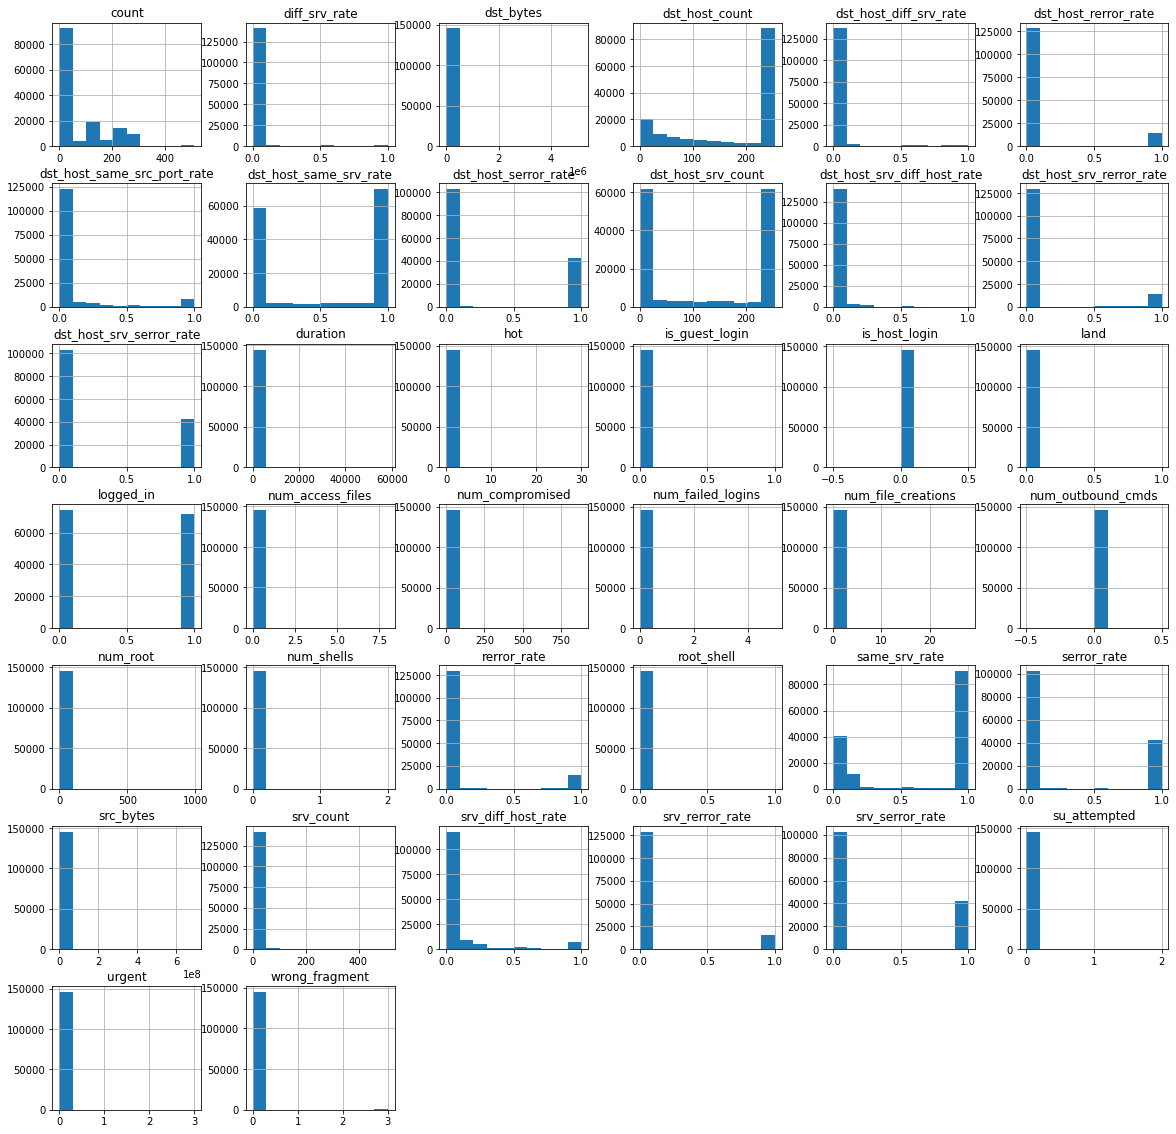

In [13]:
train_x.hist(figsize=(20, 20));

In [ ]:
feature = ['src_bytes', 'dst_bytes']
train_x[feature].sort_values(ascending=False, by = feature)

In [ ]:
train_x[feature].plot(subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4))

In [ ]:
import seaborn as sns
sns.set()
sns.distplot(np.log1p(train_x.src_bytes))

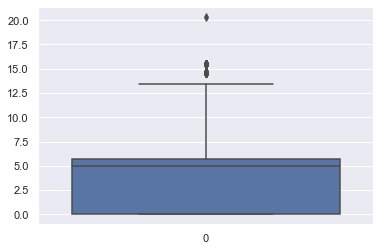

In [17]:
sns.boxplot(data=np.log1p(train_x.src_bytes))

In [18]:
train_x.sort_values(by=['src_bytes'], ascending=False)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
42063,2,tcp,finger,RSTO,693375640,0,0,0,0,1,...,255,3,0.01,0.09,0.22,0.00,0.18,0.67,0.05,0.33
142590,5057,tcp,ftp_data,SF,5135678,0,0,0,0,0,...,1,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
142173,5043,tcp,ftp_data,SF,5135678,0,0,0,0,2,...,5,46,1.00,0.00,1.00,0.04,0.00,0.02,0.00,0.00
142408,5040,tcp,ftp_data,SF,5135678,0,0,0,0,3,...,5,37,1.00,0.00,1.00,0.14,0.00,0.00,0.00,0.00
142454,5051,tcp,other,SF,5135678,0,0,0,0,2,...,7,1,0.14,0.29,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365582,0,tcp,private,S0,0,0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.00,1.00,1.00,0.00,0.00
365583,0,tcp,private,S0,0,0,0,0,0,0,...,255,14,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00
365584,0,tcp,http_443,S0,0,0,0,0,0,0,...,255,4,0.02,0.06,0.00,0.00,1.00,1.00,0.00,0.00
365585,0,tcp,private,S0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [19]:
train_x.sort_values(by=['dst_bytes'], ascending=False)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
77147,10,tcp,ftp_data,SF,0,5155468,0,0,0,0,...,4,4,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
77155,9,tcp,ftp_data,SF,0,5153771,0,0,0,0,...,12,12,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
77146,9,tcp,ftp_data,SF,0,5153460,0,0,0,0,...,3,3,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
77148,10,tcp,ftp_data,SF,0,5151385,0,0,0,0,...,5,5,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
77159,10,tcp,ftp_data,SF,0,5151154,0,0,0,0,...,16,16,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348847,0,tcp,ftp_data,SF,6601,0,0,0,0,0,...,70,97,0.79,0.04,0.79,0.02,0.0,0.0,0.0,0.0
348846,0,tcp,ftp_data,SF,15377,0,0,0,0,0,...,60,97,0.75,0.05,0.75,0.02,0.0,0.0,0.0,0.0
348844,0,tcp,ftp_data,SF,12,0,0,0,0,0,...,40,97,0.88,0.08,0.88,0.02,0.0,0.0,0.0,0.0
348843,0,tcp,ftp_data,SF,59,0,0,0,0,0,...,30,91,0.97,0.07,0.97,0.02,0.0,0.0,0.0,0.0


In [ ]:
train_x = train_x.drop([42063])
train_y = train_y.drop([42063])
train_x.sort_values(by=['src_bytes'], ascending=False)

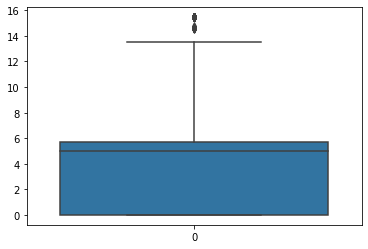

In [17]:
sns.boxplot(data=np.log1p(train_x.src_bytes))

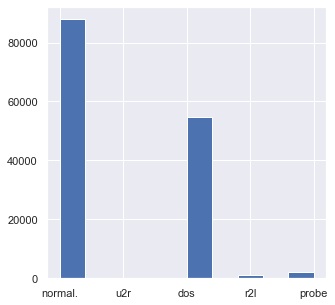

In [22]:
train_y['result'].hist(figsize=(5, 5))

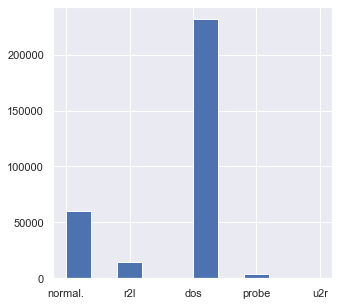

In [23]:
test_y['result'].hist(figsize=(5, 5))

# Data processing

In [ ]:
train_x[['protocol_type', 'service', 'flag']].head(5)

In [ ]:
train_x_dum = pd.get_dummies(train_x)
test_x_dum = pd.get_dummies(test_x)
train_x_dum.head(5)

# Feature transformation

In [ ]:
train_x_dum['src_bytes'] = np.log1p(train_x_dum.src_bytes)
train_x_dum['dst_bytes'] = np.log1p(train_x_dum.dst_bytes)
test_x_dum['src_bytes'] = np.log1p(test_x_dum.src_bytes)
test_x_dum['dst_bytes'] = np.log1p(test_x_dum.dst_bytes)

In [ ]:
train_x_dum['src_bytes'].head(10)

# Feature selection

In [ ]:
train_y_label = train_y.copy()
train_y_label.loc[(train_y_label.result == 'normal.'), 'result'] = '0'
train_y_label.loc[(train_y_label.result == 'probe'), 'result'] = '1'
train_y_label.loc[(train_y_label.result == 'dos'), 'result'] = '2'
train_y_label.loc[(train_y_label.result == 'u2r'), 'result'] = '3'
train_y_label.loc[(train_y_label.result == 'r2l'), 'result'] = '4'

In [ ]:
test_y_label = test_y.copy()
test_y_label.loc[(test_y.result == 'normal.'), 'result'] = '0'
test_y_label.loc[(test_y.result == 'probe'), 'result'] = '1'
test_y_label.loc[(test_y.result == 'dos'), 'result'] = '2'
test_y_label.loc[(test_y.result == 'u2r'), 'result'] = '3'
test_y_label.loc[(test_y.result == 'r2l'), 'result'] = '4'

In [ ]:
train_y_label = train_y_label.astype('int')
test_y_label = test_y_label.astype('int')

In [ ]:
import xgboost as xgb

In [31]:
dtrain = xgb.DMatrix(train_x_dum, label=train_y_label, missing = 0)

param = {'max_depth':6, 'eta':0.15, 'silent':1, 'gamma':0, 'objective':'reg:linear'}
num_round = 300
model = xgb.train(param, dtrain, num_round)

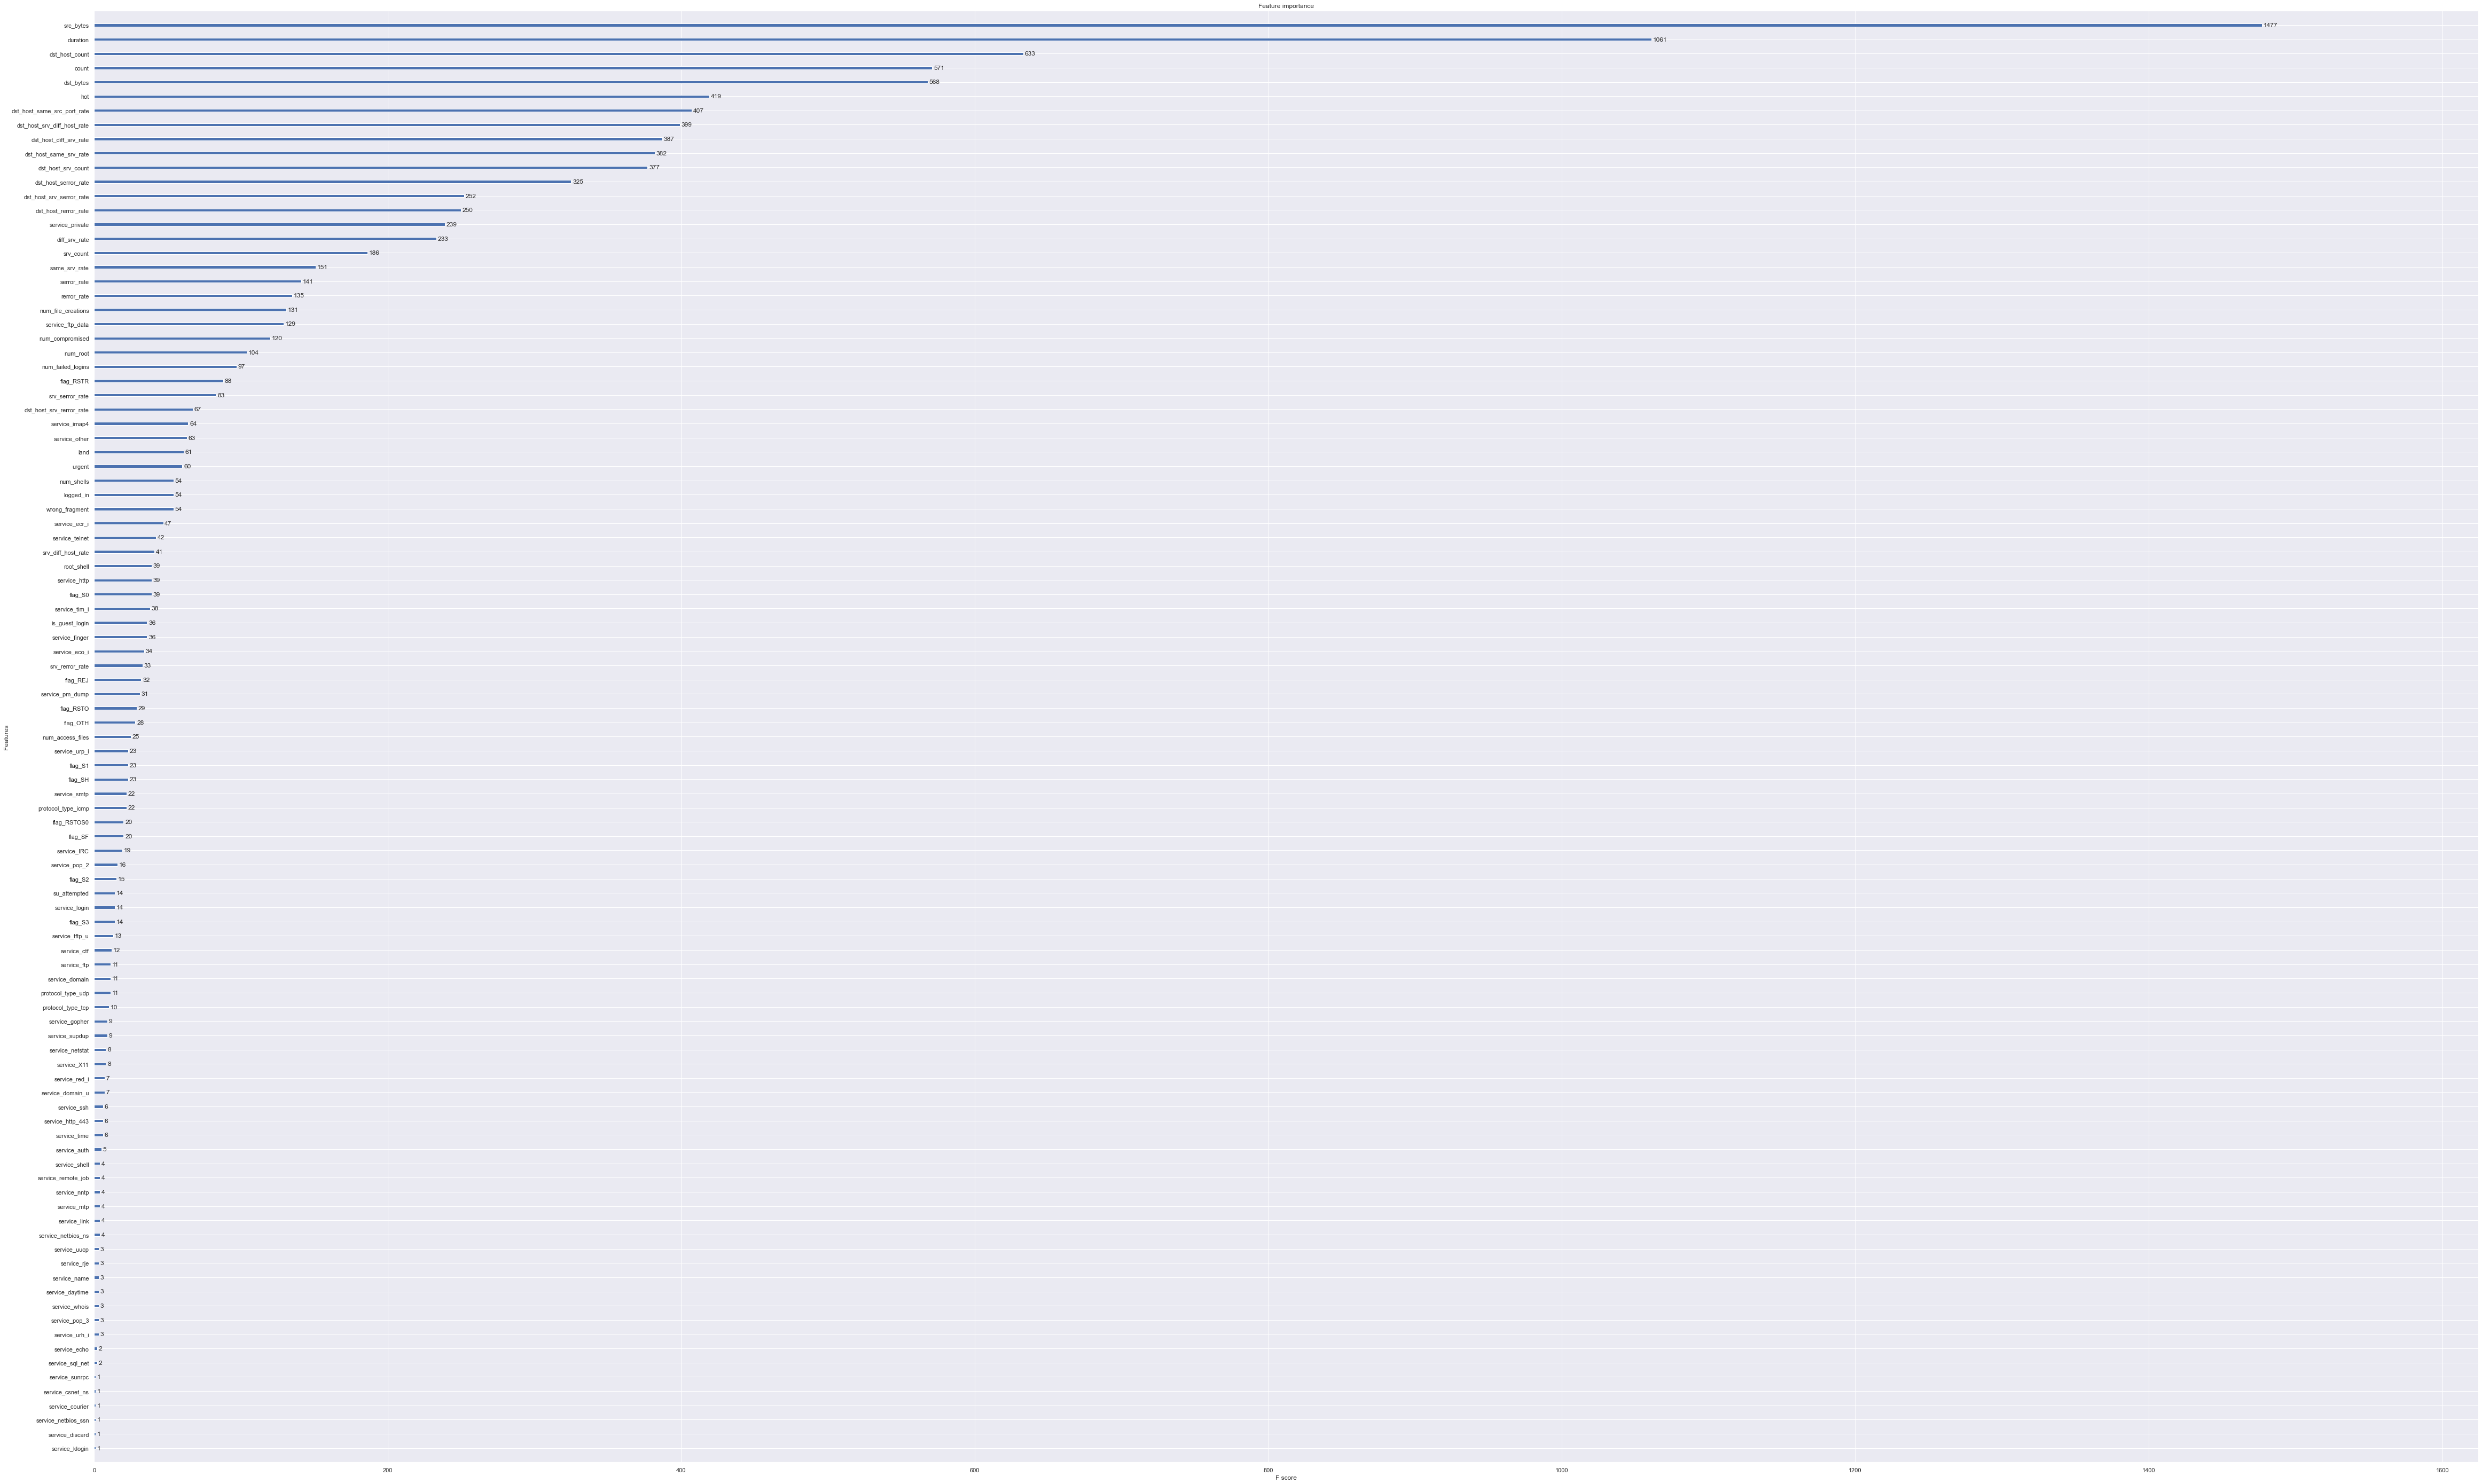

In [32]:
fig, ax = plt.subplots(figsize=(80, 50))
xgb.plot_importance(model, ax = ax)

In [ ]:
train_set = train_x_dum.drop(['is_guest_login', 'num_access_files', 'num_shells', 'srv_rerror_rate', 'root_shell', \
                             'urgent', 'land', 'num_failed_logins', 'wrong_fragment', 'dst_host_srv_rerror_rate', \
                             'srv_serror_rate', 'num_file_creations', 'num_root', 'serror_rate', 'logged_in', \
                             'num_compromised', 'service_red_i', 'service_urh_i'], axis = 1)
test_set = test_x_dum.drop(['is_guest_login', 'num_access_files', 'num_shells', 'srv_rerror_rate', 'root_shell', \
                             'urgent', 'land', 'num_failed_logins', 'wrong_fragment', 'dst_host_srv_rerror_rate', \
                             'srv_serror_rate', 'num_file_creations', 'num_root', 'serror_rate', 'logged_in', \
                             'num_compromised', 'service_icmp'], axis = 1)

In [33]:
list(train_set)

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'su_attempted',
 'num_outbound_cmds',
 'is_host_login',
 'count',
 'srv_count',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_imap4',
 'service_iso_tsap',
 'servic

In [ ]:
train_set.to_csv('./data/train_all_processed.csv', header = False)
train_y.to_csv('./data/train_all_label.csv', header = False)
test_set.to_csv('./data/test_processed.csv', header = False)
test_y.to_csv('./data/test_label.csv', header = False)

In [ ]:
test_y

# ML algorithm
1. DecisionTreeClassifier

In [35]:
from sklearn.model_selection import KFold
train_set_arr = train_set.to_numpy()
train_y_arr = train_y_label.to_numpy()
kf = KFold(n_splits=10, shuffle=False)
kf.get_n_splits(train_set_arr)

10

In [36]:
from sklearn.tree import DecisionTreeClassifier
for train_index, test_index in kf.split(train_set_arr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_set_arr[train_index], train_set_arr[test_index]
    y_train, y_test = train_y_arr[train_index], train_y_arr[test_index]
    clf_dt = DecisionTreeClassifier(random_state=0, max_depth = 8, class_weight = 'balanced')
    clf_dt.fit(X_train, y_train)
#     y_predict_clf = clf.predict(X_test)
    print(clf_dt.score(X_test, y_test))

TRAIN: [ 14559  14560  14561 ... 145582 145583 145584] TEST: [    0     1     2 ... 14556 14557 14558]
0.9936808846761453
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [14559 14560 14561 ... 29115 29116 29117]
0.9787760148361838
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [29118 29119 29120 ... 43674 43675 43676]
0.9326876845937221
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [43677 43678 43679 ... 58233 58234 58235]
0.981523456281338
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [58236 58237 58238 ... 72792 72793 72794]
0.9811113400645649
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [72795 72796 72797 ... 87350 87351 87352]
0.9507487292210468
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [ 87353  87354  87355 ... 101908 101909 101910]
0.9786371754361863
TRAIN: [     0      1      2 ... 145582 145583 145584] TEST: [101911 101912 101913 ... 116466 116467 116468]
0.9951229564500618
TRAIN: [     

In [55]:
# for train_index, test_index in kf.split(train_set_arr):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = train_set_arr[train_index], train_set_arr[test_index]
#     y_train, y_test = train_y_arr[train_index], train_y_arr[test_index]
    
#     param_dist = {'max_depth':6, 'eta':0.15, 'silent':1, 'gamma':0, 'objective':'multi:softmax', 'num_class':6}

#     model_xgb_classifier = xgb.XGBClassifier(**param_dist)
#     model_xgb_classifier.fit(X_train, y_train,
#         eval_set=[(X_train, y_train), (X_test, y_test)],
#         eval_metric='logloss',
#         verbose=True)
#     evals_result = clf.evals_result()
#     print(evals_result)

TRAIN: [ 49402  49403  49404 ... 494017 494018 494019] TEST: [    0     1     2 ... 49399 49400 49401]


d:\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoostError: [18:24:51] C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/metric/elementwise_metric.cu:332: Check failed: preds.Size() == info.labels_.Size() (2223090 vs. 444618) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification

In [63]:
clf_dt = DecisionTreeClassifier(random_state=0, max_depth = 8, class_weight = 'balanced', ccp_alpha = 0.05)
clf_dt.fit(train_set, train_y_label)

DecisionTreeClassifier(ccp_alpha=0.05, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [64]:
y_predict_clf_dt = clf_dt.predict(test_set)
y_predict_clf_dt

array([0, 0, 0, ..., 0, 0, 0])

2. Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# train_set, train_y_label = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, \
#                            random_state=0, shuffle=False)
clf_rf = RandomForestClassifier(max_depth=6, random_state=0)

clf_rf.fit(train_set, train_y_label)

<ipython-input-39-5112554d0ad5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(train_set, train_y_label)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
y_predict_clf_rf = clf_rf.predict(test_set)
y_predict_clf_rf

array([0, 0, 0, ..., 0, 0, 0])

3. xgboost

In [39]:
train_set.shape

(1074991, 104)

In [40]:
test_set.shape

(311029, 100)

In [ ]:
dtrain = xgb.DMatrix(train_set, label=train_y_label, missing = 0)

param = {'max_depth':6, 'eta':0.15, 'silent':1, 'gamma':0, 'objective':'multi:softmax', 'num_class':5}
num_round = 200
model = xgb.train(param, dtrain, num_round)

In [ ]:
dm_test = xgb.DMatrix(test_set[:10000], missing = 0)
start_time = time.time()
y_predict_clf_xgb = model.predict(dm_test)
end_time = time.time()
y_predict_clf_xgb
end_time - start_time

In [44]:
model.save_model('xgboost_origin_model')

In [38]:
pickle.dump(model, open("xgboost_origin_model.dat", "wb"))

In [39]:
loaded_model = pickle.load(open("xgboost_origin_model.dat", "rb"))

In [40]:
test = loaded_model.predict(dm_test)

In [41]:
(y_predict_clf_xgb == test).all()

True

In [47]:
bst = xgb.Booster({'nthread': 4})
m = bst.load_model('xgboost_origin_model')

In [78]:
a = pd.DataFrame([[0,4.663439094112067,4.990432586778736,0,0,0,0,1,1,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
 0,0,0,1,0]])
a

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,4.663439,4.990433,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
bst.predict(xgb.DMatrix(a), validate_features=False)

array([0.], dtype=float32)

In [55]:
test_set

,duration,src_bytes,dst_bytes,hot,su_attempted,num_outbound_cmds,is_host_login,count,srv_count,rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,4.663439,4.990433,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,4.663439,4.990433,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,4.663439,4.990433,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,4.663439,4.990433,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,4.663439,4.990433,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,4.663439,4.997212,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0
311025,0,4.663439,4.997212,0,0,0,0,4,4,0.0,...,0,0,0,0,0,0,0,0,1,0
311026,0,4.663439,4.997212,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0
311027,0,4.663439,4.997212,0,0,0,0,4,4,0.0,...,0,0,0,0,0,0,0,0,1,0


4. XGBClassifier

In [43]:
param_dist = {'max_depth':6, 'eta':0.15, 'silent':1, 'gamma':0, 'objective':'multi:softmax', 'num_class':5}

model_xgb_classifier = xgb.XGBClassifier(**param_dist)
model_xgb_classifier.fit(train_set, train_y_label, verbose=True)

d:\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.150000006, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [44]:
y_predict_clf_xgbclassifier = model_xgb_classifier.predict(test_set)
y_predict_clf_xgbclassifier

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
%%time
time.sleep(2)

2 s ± 353 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
y_predict_clf_xgb[816]

2.0

# Tuning model

In [50]:
param_dist = {'max_depth':6, 'eta':0.15, 'silent':1, 'gamma':1, 'objective':'multi:softmax', 'num_class':6}

model_xgb_classifier = xgb.XGBClassifier(**param_dist)
model_xgb_classifier.fit(train_set, train_y_label, verbose=True)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.150000006, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [51]:
y_predict_clf_xgbclassifier = model_xgb_classifier.predict(test_set)
y_predict_clf_xgbclassifier
eva_fun_2(test_y_label, y_predict_clf_xgbclassifier, "xgboostclassifier")

Algorithm: xgboostclassifier
              precision    recall  f1-score   support

      normal       0.74      1.00      0.85     60593
       probe       0.92      0.81      0.86      4166
         dos       1.00      0.97      0.98    231455
         u2r       0.67      0.17      0.27        70
         r2l       0.00      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.66      0.59      0.59    311029
weighted avg       0.90      0.92      0.91    311029



In [76]:
def tune_eva(predict):
    predict = predict.astype('int')
    num = 0
    for i in range(len(test_y_label)):
        if (test_y_label['result'][i] == predict[i]):
            num += 1
    return num/len(test_y_label)

In [83]:
param_test = { 'gamma':[i/20.0 for i in range(0,100)] }    # 0.05, 0.1, 0.15, ...... 5
Max_score = 0
gama = 0;
for i in range(100):
    xgbclass = XGBClassifier(gamma = param_test['gamma'][i], max_depth=6, eta=0.15, silent=1, \
                             objective='multi:softmax', num_class=5)
    xgbclass.fit(train_set, train_y_label)
    y_tune_xgbclassifier = xgbclass.predict(test_set)
    score = tune_eva(y_tune_xgbclassifier)
    print("iteration: " + str(i) + " gamma: " + str(param_test['gamma'][i]) + " score: " + str(score))
    if (score > Max_score):
        Max_score = score
        gama = param_test['gamma'][i]
print("The highest score's gamma is " + str(gama))
# gsearch = GridSearchCV(estimator = XGBClassifier( max_depth=6, eta=0.15, silent=1, \
#                     objective='multi:softmax', num_class=5), \
#                     param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch.fit(train_set, train_y_label)
# gsearch.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

iteration: 0 gamma: 0.0 score: 0.9240906796472355
iteration: 1 gamma: 0.05 score: 0.9242096396155985
iteration: 2 gamma: 0.1 score: 0.9240424526330342
iteration: 3 gamma: 0.15 score: 0.9240810342443952
iteration: 4 gamma: 0.2 score: 0.9242482212269596
iteration: 5 gamma: 0.25 score: 0.9240006558873931
iteration: 6 gamma: 0.3 score: 0.9240038710216733
iteration: 7 gamma: 0.35 score: 0.9242064244813185
iteration: 8 gamma: 0.4 score: 0.9241742731385176
iteration: 9 gamma: 0.45 score: 0.92426429689836
iteration: 10 gamma: 0.5 score: 0.9241646277356774
iteration: 11 gamma: 0.55 score: 0.9242417909583994
iteration: 12 gamma: 0.6 score: 0.9243125239125612
iteration: 13 gamma: 0.65 score: 0.9243125239125612
iteration: 14 gamma: 0.7 score: 0.9243285995839616
iteration: 15 gamma: 0.75 score: 0.9242578666297998
iteration: 16 gamma: 0.8 score: 0.9243028785097209
iteration: 17 gamma: 0.85 score: 0.9242257152869989
iteration: 18 gamma: 0.9 score: 0.9242064244813185
iteration: 19 gamma: 0.95 score: 0

In [34]:
xgbclass = XGBClassifier(gamma = 1, max_depth=6, eta=0.15, silent=1, max_delta_step = 10, \
                             n_jobs = 8, objective='multi:softmax', num_class=5, reg_alpha = 0 \
                        , scale_pos_weight = -500)
xgbclass.fit(train_set, train_y_label)
y_predict_best = xgbclass.predict(test_set)
eva_fun_2(test_y_label, y_predict_best, "xgboost")
tune_eva(y_predict_best)

NameError: name 'XGBClassifier' is not defined

In [90]:
xgbclass = XGBClassifier(gamma = 1, max_depth=8, eta=0.1, silent=1, max_delta_step = 1, \
                             n_jobs = 8, objective='multi:softmax', num_class=5)
xgbclass.fit(train_set, train_y_label)
y_predict_best = xgbclass.predict(test_set)
eva_fun_2(test_y_label, y_predict_best, "xgboostclassifier")
tune_eva(y_predict_best)

Algorithm: xgboostclassifier
              precision    recall  f1-score   support

      normal       0.76      1.00      0.86     60593
       probe       0.91      0.77      0.84      4166
         dos       0.99      0.97      0.98    231455
         u2r       0.68      0.19      0.29        70
         r2l       0.00      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.67      0.58      0.59    311029
weighted avg       0.90      0.92      0.91    311029



0.9236727121908247

# Recall, Percision, F1-Score

In [45]:
# not used
def eva_fun (real, predict, algo):
    if (len(real) != len(predict)):
        print("Error: length is not the same")
        return -1
    sum_real_arr = real['result'].value_counts().sort_index().values
    sum_pre_arr = predict['result'].value_counts().sort_index().values
    real = real.astype('int')
    predict = predict.astype('int')
    # index 1~5 represent five classes
    Tp = np.array([0, 0, 0, 0, 0, 0])
    for i in range(len(real)):
        if (real['result'][i] == predict['result'][i]):
            Tp[real['result'][i]] += 1
    percision = [0, 0, 0, 0, 0]
    recall = [0, 0, 0, 0, 0]
    F1 = [0, 0, 0, 0, 0]
    for i in range(0, 5):
        percision[i] = Tp[(i+1)]/sum_pre_arr[i]
        recall[i] = Tp[i+1]/sum_real_arr[i]
        F1[i] = 2*(percision[i]*recall[i]/(percision[i]+recall[i]))
    percision[0] = Tp[(1)]/sum_pre_arr[0]
#     print(Tp[1]/sum_pre_arr[0])
    print("algorithm: " + algo + '\n')
    print("\t\tnormal\t\t\tprobe\t\t\tdos\t\t\tu2r\t\t\tr2l\n")
    print("percision: \t" + str(percision[0]) + '\t' + str(percision[1]) + '\t' + str(percision[2]) \
          + '\t' + str(percision[3]) + '\t' + str(percision[4]) + '\n' )
    print("recall: \t" + str(recall[0]) + '\t' + str(recall[1]) + '\t' + str(recall[2]) \
          + '\t' + str(recall[3]) + '\t' + str(recall[4]) + '\n' )
    print("F1-score: \t" + str(F1[0]) + '\t' + str(F1[1]) + '\t' + str(F1[2]) \
          + '\t' + str(F1[3]) + '\t' + str(F1[4]) + '\n' )
    print("total percision: " + str(Tp.sum()/sum_pre_arr.sum()) + '\n')

In [46]:
eva_fun(test_y_label, pd.DataFrame(y_predict_clf_xgb, columns=['result']), "xgboost")

algorithm: xgboost

		normal			probe			dos			u2r			r2l

percision: 	0.039328432442924034	63.31720430107527	6.249525705638412e-05	0.2608695652173913	0.0

recall: 	0.05350453022626376	53.711713874219875	6.048691970361409e-05	0.08571428571428572	0.0

F1-score: 	0.04533409775776601	58.12025974025974	6.147468999192047e-05	0.12903225806451615	nan

total percision: 0.9237530905478267



<ipython-input-45-25f8ff088def>:20: RuntimeWarning: invalid value encountered in double_scalars
  F1[i] = 2*(percision[i]*recall[i]/(percision[i]+recall[i]))


In [35]:
from sklearn.metrics import classification_report
def eva_fun_2 (real, predict, algo):
    if (len(real) != len(predict)):
        print("Error: length is not the same")
        return -1
    real = real.astype('int')
    predict = predict.astype('int')
    target_names = ['normal', 'probe', 'dos', 'u2r', 'r2l']
    print("Algorithm: " + algo)
    print(classification_report(real.astype('int'), predict.astype('int'), target_names=target_names))

In [36]:
eva_fun_2(test_y_label, y_predict_clf_xgb, "xgboost_PC")

Algorithm: xgboost_PC
              precision    recall  f1-score   support

      normal       0.73      1.00      0.84     60593
       probe       0.93      0.77      0.84      4166
         dos       1.00      0.97      0.98    231455
         u2r       0.71      0.21      0.33        70
         r2l       0.00      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.68      0.59      0.60    311029
weighted avg       0.90      0.92      0.91    311029



In [65]:
# from sklearn.metrics import classification_report
# target_names = ['probe', 'dos', 'u2r', 'r2l', 'normal']
# print(classification_report(test_y_label.astype('int'), y_predict_clf_xgb.astype('int'), target_names=target_names))
eva_fun_2(test_y_label, y_predict_clf_dt, "decision tree")
eva_fun_2(test_y_label, y_predict_clf_rf, "random forest")
eva_fun_2(test_y_label, y_predict_clf_xgb, "xgboost")
eva_fun_2(test_y_label, y_predict_clf_xgbclassifier, "xgboostclassifier")

Algorithm: decision tree
              precision    recall  f1-score   support

      normal       0.23      0.90      0.37     60593
       probe       0.07      0.82      0.14      4166
         dos       0.98      0.07      0.14    231455
         u2r       0.01      0.51      0.02        70
         r2l       0.07      0.03      0.04     14745

    accuracy                           0.24    311029
   macro avg       0.27      0.47      0.14    311029
weighted avg       0.78      0.24      0.18    311029

Algorithm: random forest
              precision    recall  f1-score   support

      normal       0.72      1.00      0.83     60593
       probe       0.95      0.72      0.82      4166
         dos       1.00      0.96      0.98    231455
         u2r       0.00      0.00      0.00        70
         r2l       0.00      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.53      0.54      0.53    311029
weighted avg       0.90    

d:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Algorithm: xgboost
              precision    recall  f1-score   support

      normal       0.73      0.99      0.84     60593
       probe       0.92      0.78      0.84      4166
         dos       1.00      0.97      0.98    231455
         u2r       0.61      0.20      0.30        70
         r2l       0.01      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.65      0.59      0.59    311029
weighted avg       0.90      0.92      0.91    311029

Algorithm: xgboostclassifier
              precision    recall  f1-score   support

      normal       0.74      1.00      0.85     60593
       probe       0.92      0.81      0.86      4166
         dos       1.00      0.97      0.98    231455
         u2r       0.67      0.17      0.27        70
         r2l       0.00      0.00      0.00     14745

    accuracy                           0.92    311029
   macro avg       0.66      0.59      0.59    311029
weighted avg       0.90     

# Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
def eva_confusion_matrix(real, predict, algo):
    real = real.astype('int')
    predict = predict.astype('int')
    m = confusion_matrix(real, predict, normalize = 'true')
    df_cm = pd.DataFrame(m, index = ['normal', 'probe', 'dos', 'u2r', 'r2l'],
                      columns = ['normal', 'probe', 'dos', 'u2r', 'r2l'])
    plt.figure(figsize = (10,7))
    print("Algorithm: " + algo)
    sns.heatmap(df_cm, annot=True)

Algorithm: decision tree


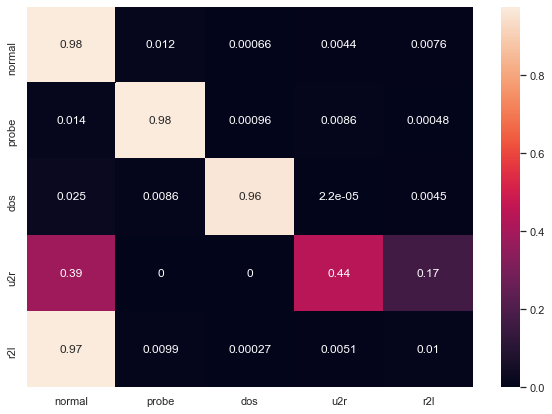

In [52]:
eva_confusion_matrix(test_y_label, y_predict_clf_dt, "decision tree");

Algorithm: random forest


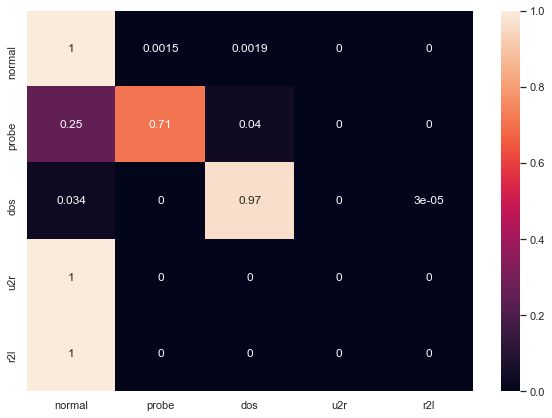

In [53]:
eva_confusion_matrix(test_y_label, y_predict_clf_rf, "random forest");

Algorithm: xgboost


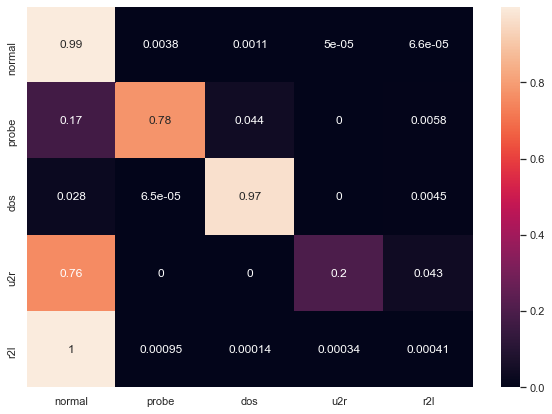

In [54]:
eva_confusion_matrix(test_y_label, y_predict_clf_xgb, "xgboost");